In [ ]:
!pip install numpy==1.26.4
!pip install dmba

#!pip install cufflinks
import cufflinks as cf
cf.go_offline() # Configure cufflinks for offline use

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Adjust the file name as per your upload
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')  # Or use 'unicode_escape'

In [4]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
# Checking the first 5 rows of data
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
df.shape

(180519, 53)

In [7]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


# **check data**

In [8]:
df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [9]:
df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

In [10]:
df['Shipping Mode'].value_counts()

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

In [11]:
df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

In [12]:
# Status of the product stock :If it is 1 not available , 0 the product is available
df['Product Status'].value_counts()

Product Status
0    180519
Name: count, dtype: int64

In [13]:
df['Product Status'].unique()

array([0], dtype=int64)

In [14]:
num_unique_product_statuses = df['Product Status'].nunique()
print(f"Number of unique product statuses: {num_unique_product_statuses}")

Number of unique product statuses: 1


In [15]:
df[['Delivery Status', 'Product Status', 'Shipping Mode','Type' ]].value_counts()

Delivery Status    Product Status  Shipping Mode   Type    
Advance shipping   0               Standard Class  DEBIT       16549
Late delivery      0               Standard Class  DEBIT       16408
                                   First Class     DEBIT       10762
                                   Second Class    DEBIT       10720
Advance shipping   0               Standard Class  TRANSFER    10226
Late delivery      0               Standard Class  TRANSFER    10121
Advance shipping   0               Standard Class  PAYMENT     10008
Late delivery      0               Standard Class  PAYMENT      9961
Shipping on time   0               Standard Class  DEBIT        8420
Late delivery      0               Second Class    PAYMENT      6775
                                   First Class     TRANSFER     6512
                                   Second Class    TRANSFER     6497
                                   First Class     PAYMENT      6222
Shipping on time   0               Standard

In [16]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [18]:
df.duplicated().sum()

0

In [19]:
df['Product Description']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
180514   NaN
180515   NaN
180516   NaN
180517   NaN
180518   NaN
Name: Product Description, Length: 180519, dtype: float64

# **Variables**

- **Customer Data:(11)** Customer Id, Customer City, Customer Country, Customer Email, Customer Fname, Customer Lname, Customer Password, Customer Segment, Customer State, Customer Street, Customer Zipcode


- **Order Data:(21)**
Order Id, Order Customer Id, Order Item Id, Order Item Cardprod Id
Order date (DateOrders)
Order Status
Order City, Order Country, Order Region, Order State, Order Zipcode
Order Item Quantity, Order Item Discount, Order Item Discount Rate
Order Item Product Price, Order Item Profit Ratio
Order Item Total, Order Profit Per Order
Sales, Benefit per order, Sales per customer


- **Product Data:(10/11)** Product Card Id, Category Id = Product Category Id
Category Name
Product Name, Product Description, Product Image
Product Price, Product Status
Department Id, Department Name

- **Shipping/Delivery:(10)**
Type
Shipping Mode
shipping date (DateOrders)
Days for shipping (real)
Days for shipment (scheduled)
Delivery Status
Late_delivery_risk
Latitude, Longitude
Market

# **Data Cleaning**

In [5]:
df['Customer_Full_Name'] = df['Customer Fname'].astype(str) + ' ' + df['Customer Lname'].astype(str)

# **check full name**

In [6]:
df['Customer_Full_Name']

0            Cally Holloway
1                Irene Luna
2         Gillian Maldonado
3                 Tana Tate
4            Orli Hendricks
                ...        
180514       Maria Peterson
180515         Ronald Clark
180516           John Smith
180517           Mary Smith
180518        Andrea Ortega
Name: Customer_Full_Name, Length: 180519, dtype: object

In [22]:
df['Customer_Full_Name'].value_counts()

Customer_Full_Name
Mary Smith           23884
Robert Smith           744
James Smith            726
David Smith            723
John Smith             645
                     ...  
Kevyn Christensen        1
Karleigh Conley          1
Linda Workman            1
Mari Beach               1
Hyacinth Witt            1
Name: count, Length: 14033, dtype: int64

In [23]:
unique_names = df['Customer_Full_Name'].unique()
print(unique_names)

['Cally Holloway' 'Irene Luna' 'Gillian Maldonado' ... 'Anika Davenport'
 'Yuri Smith' 'Hyacinth Witt']


In [24]:
num_unique_names = len(unique_names)
print(f"Number of unique names: {num_unique_names}")

Number of unique names: 14033


In [25]:
df['Customer_Full_Name'].duplicated().sum()

166486

# **Data Cleaning**

In [6]:
df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
         'Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode',
         'shipping date (DateOrders)'],axis=1, inplace = True)



In [27]:
df.shape

(180519, 42)

In [7]:
#Customer Zipcode has 3 null values which we will fill with 0 as we cannot be sure of the zip code of the customers
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

In [29]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

# **Why need to split order date**

- **Temporal patterns in fraud:**

  - Fraudulent transactions may occur more frequently during specific days of the week (e.g., weekends) or hours of the day (e.g., late night or non-business hours).
  - Certain months or years may correspond to known spikes in fraudulent activity (e.g., holiday seasons, financial crises).

- **Feature engineering for the model:**

  - Neural networks and other models work better with numerical or categorical  inputs rather than raw datetime objects.By breaking down the date into components, the model can learn patterns more effectively.

- **Improved detection of anomalies:**
  - If most orders occur during regular business hours or specific days, an unusual time (e.g., 3 AM on a Sunday) might be a signal of fraud.

- **Simplifies model training:**

  - Separating datetime features into granular units allows the model to capture interactions and patterns that might be hidden in the raw datetime field.

# **Data Cleaning**

In [8]:
df['order date (DateOrders)'].head()

0    1/31/2018 22:56
1    1/13/2018 12:27
2    1/13/2018 12:06
3    1/13/2018 11:45
4    1/13/2018 11:24
Name: order date (DateOrders), dtype: object

In [9]:
## Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

# **Check order date and time**

In [11]:
type(df['order_yr'])
#type(df['order_month'])

pandas.core.series.Series

In [12]:
type(df['order_day'])

pandas.core.series.Series

In [33]:
df['order_hour']

0         22
1         12
2         12
3         11
4         11
          ..
180514     3
180515     1
180516    21
180517    20
180518    18
Name: order_hour, Length: 180519, dtype: int32

In [34]:
df['order_month']

0         1
1         1
2         1
3         1
4         1
         ..
180514    1
180515    1
180516    1
180517    1
180518    1
Name: order_month, Length: 180519, dtype: int32

# **Data Visualization**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [11]:
# Separating categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode', 'Customer_Full_Name']
Numerical Features: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'order_yr', 'order_month', 'order_day', 'order_hour']


In [37]:
# Checking unique levels in categorical features
for col in categorical_features:
    print(f"Levels in {col}: {df[col].nunique()} unique values")
    print(df[col].unique(), "\n")


Levels in Type: 4 unique values
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT'] 

Levels in Delivery Status: 4 unique values
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled'] 

Levels in Category Name: 50 unique values
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games'] 

Le

Levels in order date (DateOrders): 65752 unique values
['1/31/2018 22:56' '1/13/2018 12:27' '1/13/2018 12:06' ...
 '1/21/2016 2:47' '1/20/2016 7:10' '1/17/2016 5:56'] 

Levels in Order Region: 23 unique values
['Southeast Asia' 'South Asia' 'Oceania' 'Eastern Asia' 'West Asia'
 'West of USA ' 'US Center ' 'West Africa' 'Central Africa' 'North Africa'
 'Western Europe' 'Northern Europe' 'Central America' 'Caribbean'
 'South America' 'East Africa' 'Southern Europe' 'East of USA' 'Canada'
 'Southern Africa' 'Central Asia' 'Eastern Europe' 'South of  USA '] 

Levels in Order State: 1089 unique values
['Java Occidental' 'Rajastán' 'Queensland' ... 'Bistrita-Nasaud' 'Tottori'
 'Khorezm'] 

Levels in Order Status: 9 unique values
['COMPLETE' 'PENDING' 'CLOSED' 'PENDING_PAYMENT' 'CANCELED' 'PROCESSING'
 'SUSPECTED_FRAUD' 'ON_HOLD' 'PAYMENT_REVIEW'] 

Levels in Product Name: 118 unique values
['Smart watch ' 'Perfect Fitness Perfect Rip Deck'
 "Under Armour Girls' Toddler Spine Surge Runni"
 "N

In [38]:
import pandas as pd

# Descriptive statistics for numerical features
numerical_description = df[numerical_features].describe()

# Display as a table
print("Descriptive Statistics for Numerical Features:")
print(numerical_description.to_string())


Descriptive Statistics for Numerical Features:
       Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  Sales per customer  Late_delivery_risk    Category Id    Customer Id  Customer Zipcode  Department Id  Order Customer Id       Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Product Price  Order Item Profit Ratio  Order Item Quantity          Sales  Order Item Total  Order Profit Per Order  Product Card Id  Product Category Id  Product Price       order_yr    order_month      order_day     order_hour
count             180519.000000                  180519.000000      180519.000000       180519.000000       180519.000000  180519.000000  180519.000000     180519.000000  180519.000000      180519.000000  180519.000000           180519.000000        180519.000000             180519.000000  180519.000000             180519.000000            180519.000000        180519.000000  180519.000000     180519.000

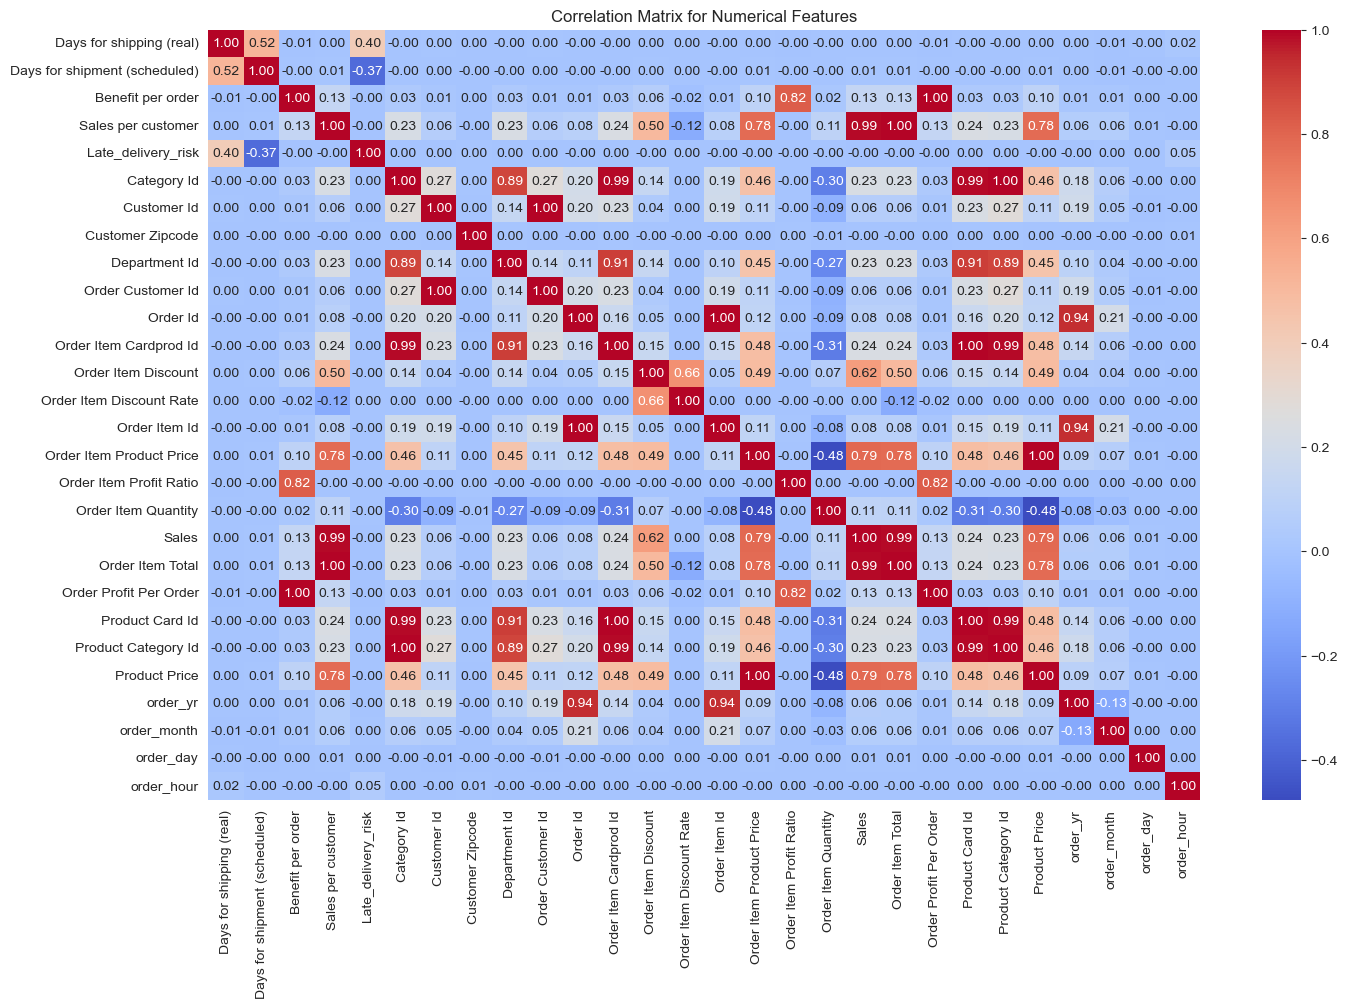

In [39]:
# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set a light background style
sns.set_style("white")

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()


In [41]:
threshold = 0.5

# Flatten the correlation matrix to create a pairwise table
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]

# Remove duplicate pairs and self-correlations
correlation_pairs = correlation_pairs[
    correlation_pairs["Feature_1"] != correlation_pairs["Feature_2"]
].drop_duplicates(subset=["Correlation"])

# Filter correlations above the threshold
strong_correlations = correlation_pairs[
    (correlation_pairs["Correlation"].abs() >= threshold)
].sort_values(by="Correlation", ascending=False)

# Display top correlations in an understandable format
print("Strong Correlations (>|0.5|):")
print(strong_correlations)


Strong Correlations (>|0.5|):
                    Feature_1                      Feature_2  Correlation
76          Benefit per order         Order Profit Per Order     1.000000
294                  Order Id                  Order Item Id     0.999623
151               Category Id         Order Item Cardprod Id     0.991092
102        Sales per customer                          Sales     0.989744
304                  Order Id                       order_yr     0.941952
416             Order Item Id                       order_yr     0.941313
235             Department Id         Order Item Cardprod Id     0.906117
246             Department Id            Product Category Id     0.888835
148               Category Id                  Department Id     0.888835
72          Benefit per order        Order Item Profit Ratio     0.823689
438  Order Item Product Price                          Sales     0.789948
99         Sales per customer       Order Item Product Price     0.781781
349     

In [42]:
print(df['Benefit per order'])

0          91.250000
1        -249.089996
2        -247.779999
3          22.860001
4         134.210007
             ...    
180514     40.000000
180515   -613.770019
180516    141.110001
180517    186.229996
180518    168.949997
Name: Benefit per order, Length: 180519, dtype: float64


In [43]:
loss = df[(df['Benefit per order']<0)]
print(loss)

            Type  Days for shipping (real)  Days for shipment (scheduled)  \
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
15         DEBIT                         2                              1   
16       PAYMENT                         5                              2   
28         DEBIT                         3                              4   
...          ...                       ...                            ...   
180495   PAYMENT                         3                              4   
180498      CASH                         3                              4   
180499     DEBIT                         4                              2   
180506   PAYMENT                         2                              1   
180515     DEBIT                         3                              2   

        Benefit per order  Sales per customer   Delivery Status  \
1       

**Some products have a negative benefit per order, indicating that the orders are costing the company money.**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LATAM'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Pacific Asia'),
  Text(3, 0, 'USCA'),
  Text(4, 0, 'Africa')])

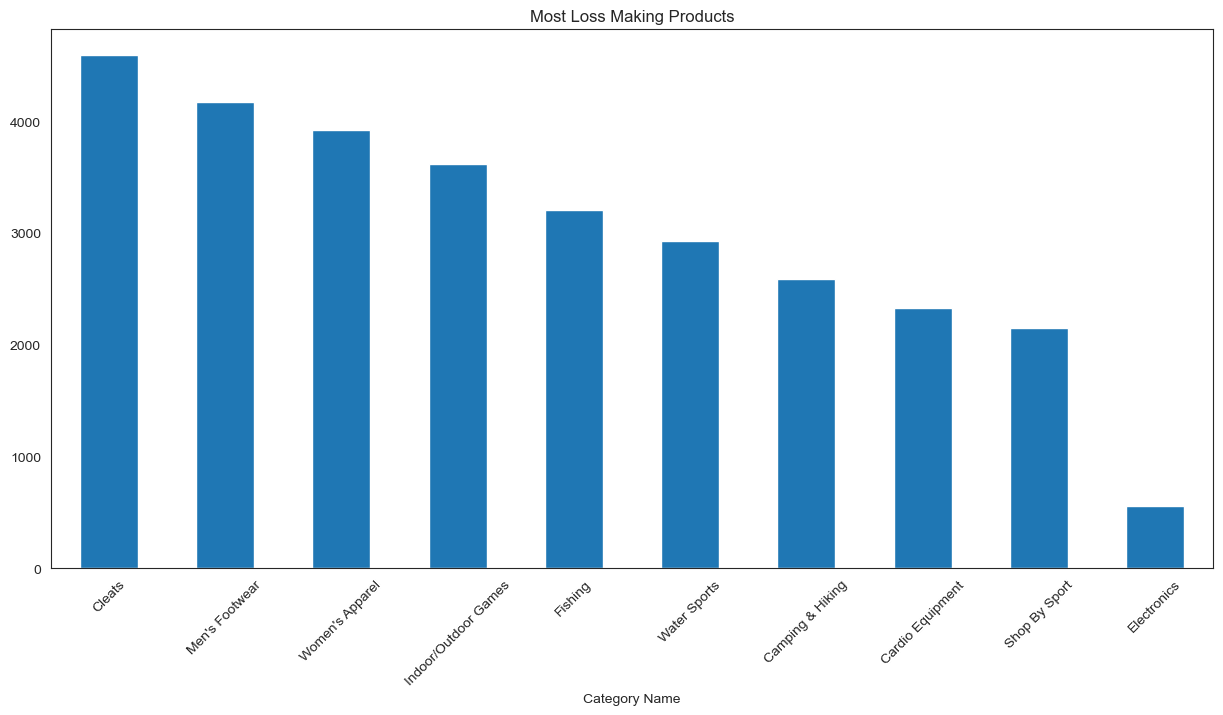

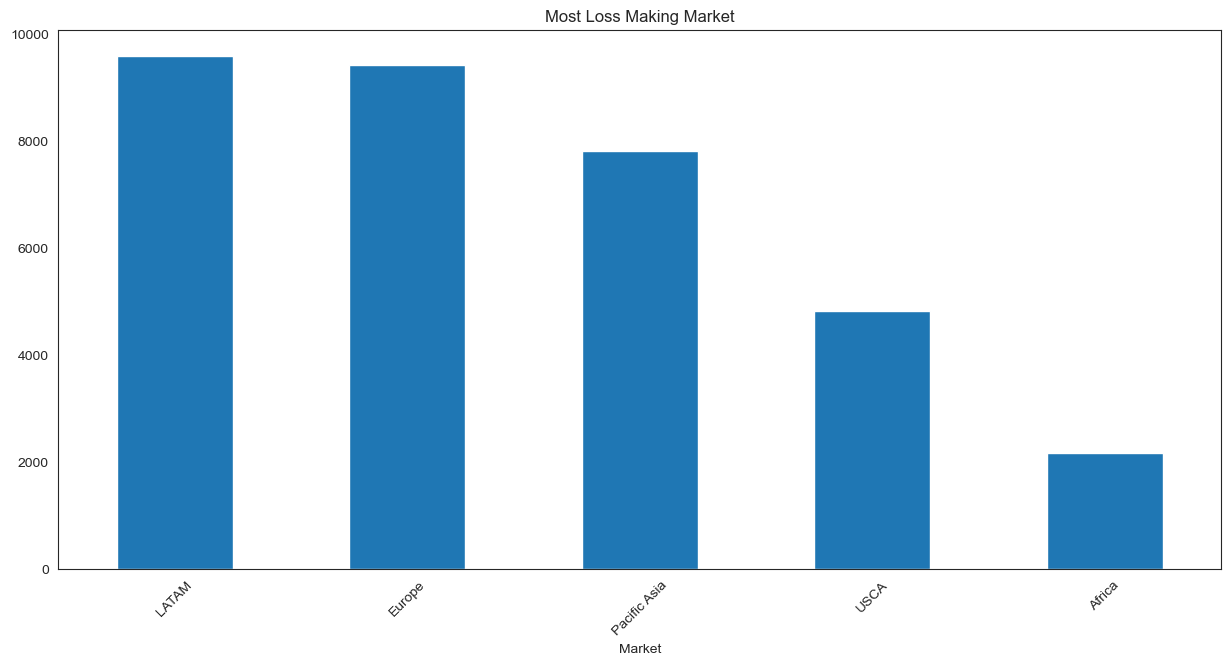

In [44]:
# Set a light background style
sns.set_style("white")

plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Products")
plt.xticks(rotation = 45)
plt.figure(2)
loss['Market'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Market")
plt.xticks(rotation = 45)

**Order Status as per the payment types**

In [12]:
status = df.groupby('Type')['Order Status'].value_counts()
status_df = status.to_frame()

In [13]:
status_df

count
Type     Order Status          
CASH     CLOSED           19616
DEBIT    COMPLETE         59491
         ON_HOLD           9804
PAYMENT  PENDING_PAYMENT  39832
         PAYMENT_REVIEW    1893
TRANSFER PROCESSING       21902
         PENDING          20227
         SUSPECTED_FRAUD   4062
         CANCELED          3692

**As we can see that only Transfer payments have a possible suspected fraud situation, what products have the most fraud?**

In [14]:
fraud_region = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]

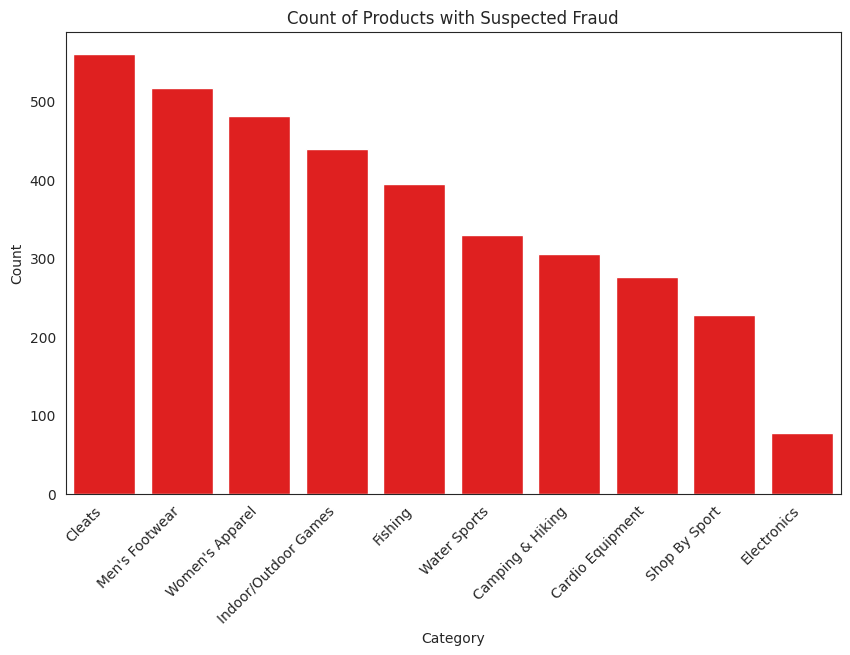

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set_style("white")

# Get the top 10 categories with suspected fraud
temp = fraud_region['Category Name'].value_counts().nlargest(10)

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=temp.index, y=temp.values, color='#FF0000')
plt.title('Count of Products with Suspected Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# **Data Modelling and Neural Networks to predict possible fraud**

In [13]:
# Creating a copy of the datafram
df_new = df.copy()

In [14]:
# Creating Binary enocode for Suspected Fraud and Late delivery

df_new['fraud'] = np.where(df_new['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
df_new['late_delivery']=np.where(df_new['Delivery Status'] == 'Late delivery', 1, 0)

In [15]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
df_new.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,Cally Holloway,2018,1,2,22,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,Irene Luna,2018,1,5,12,0,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,Gillian Maldonado,2018,1,5,12,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,Tana Tate,2018,1,5,11,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,Fitness,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,Orli Hendricks,2018,1,5,11,0,0


In [16]:
## Removing Identical columns after creating new columns

df_new.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

In [17]:
## Final dimensions of the dataset after wrangling and cleaning

df_new.shape

(180519, 44)

In [53]:
df_new.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

le = preprocessing.LabelEncoder() initializes a LabelEncoder object from the scikit-learn preprocessing module and assigns it to the variable le. This object can then be used to convert categorical labels into numerical labels.

# **Preparing Data for Neural Networks**

In [19]:
#!pip install tensorflow

#import tensorflow as tf
#print(tf.__version__)

## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import CSVLogger
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

# from tensorflow_core.estimator import inputs

In [20]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df_new['Customer Country']  = le.fit_transform(df_new['Customer Country'])
df_new['Market']            = le.fit_transform(df_new['Market'])
df_new['Type']              = le.fit_transform(df_new['Type'])
df_new['Product Name']      = le.fit_transform(df_new['Product Name'])
df_new['Customer Segment']  = le.fit_transform(df_new['Customer Segment'])
df_new['Customer State']    = le.fit_transform(df_new['Customer State'])
df_new['Order Region']      = le.fit_transform(df_new['Order Region'])
df_new['Order City']        = le.fit_transform(df_new['Order City'])
df_new['Category Name']     = le.fit_transform(df_new['Category Name'])
df_new['Customer City']     = le.fit_transform(df_new['Customer City'])
df_new['Department Name']   = le.fit_transform(df_new['Department Name'])
df_new['Order State']       = le.fit_transform(df_new['Order State'])
df_new['Shipping Mode']     = le.fit_transform(df_new['Shipping Mode'])
df_new['Order Country']     = le.fit_transform(df_new['Order Country'])
df_new['Customer_Full_Name']    = le.fit_transform(df_new['Customer_Full_Name'])

In [21]:
df_new.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,475,1360,73,78,327.75,3,1876,2018,1,2,22,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,841,1360,73,78,327.75,3,5378,2018,1,5,12,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,841,1360,73,78,327.75,3,4429,2018,1,5,12,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,835,1360,73,78,327.75,3,12929,2018,1,5,11,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,835,1360,73,78,327.75,3,10638,2018,1,5,11,0,0


In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Category Id                    180519 non-null  int64  
 6   Category Name                  180519 non-null  int64  
 7   Customer City                  180519 non-null  int64  
 8   Customer Country               180519 non-null  int64  
 9   Customer Id                    180519 non-null  int64  
 10  Customer Segment               180519 non-null  int64  
 11  Customer State                 180519 non-null  int64  
 12  Customer Zipcode              

In [67]:
df_new['fraud'].value_counts()

,count
fraud,
0,176457
1,4062


Accuracy should not be used as a metric for a dataset as imbalanced as the one you have. Instead, you should look at a metric such as Area Under Curve(AUC). If you would have infinite data, then you could just rebalance and remove some of the data from the class that has the most samples. However, in many cases data is sparse and you want to use as much of it as possible. Removing data can have a disastrous effect on many applications.

**So what are good and convenient ways of handling this?**

 - Add weights to the loss function. One weight for class A and one for B. By   increasing the magnitude of the loss for the B class the model should not get stuck in a suboptimal solution that just predicts one class.

 - Use another objective(loss) function. F1-score can, for example, be
   implemented and used as an objective(loss) function. For a differentiable version see https://stackoverflow.com/a/65320239/12229416

What is great with these approaches is that it will allow you to use all the data.

In [71]:
## percentage of class present in target variable(y)
df_new['fraud'].value_counts()/(df.shape[0])*100

,count
fraud,
0,97.749821
1,2.250179


**The data with class label 0 has much higher count that the data for the class label 1. Hence, it is highly unbalanced dataset. Before we consume this dataset for the further analysis, we need to balance the dataset.**

# **EDA (Exploratory Data Analysis)**

In [68]:
print("Fraud Cases")
print(df_new['Days for shipping (real)'][df_new.fraud == 1].describe())
print()
print("Non-Fraud Cases")
print(df_new['Days for shipping (real)'][df_new.fraud == 0].describe())

Fraud Cases
count    4062.000000
mean        3.494092
std         1.614951
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: Days for shipping (real), dtype: float64

Non-Fraud Cases
count    176457.000000
mean          3.497736
std           1.623928
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64


In [69]:
# For actual vs scheduled shipping days
for column in ['Days for shipping (real)', 'Days for shipment (scheduled)']:
    print(f"\nAnalyzing {column}")
    print("\nFraud Cases")
    print(df_new[column][df_new.fraud == 1].describe())
    print("\nNon-Fraud Cases")
    print(df_new[column][df_new.fraud == 0].describe())


Analyzing Days for shipping (real)

Fraud Cases
count    4062.000000
mean        3.494092
std         1.614951
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: Days for shipping (real), dtype: float64

Non-Fraud Cases
count    176457.000000
mean          3.497736
std           1.623928
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64

Analyzing Days for shipment (scheduled)

Fraud Cases
count    4062.000000
mean        2.908912
std         1.389295
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Days for shipment (scheduled), dtype: float64

Non-Fraud Cases
count    176457.000000
mean          2.932374
std           1.374105
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: Days fo

# **Preparing Data for Neural Networks**
Creating a Validation Set from the orignal data

In [22]:
## Selecting 10% of the dataset for validation

fraction_of_rows = df_new.sample(frac=0.1, random_state = 1)
fraction_of_rows

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
101369,3,2,4,71.849998,197.919998,46,30,529,0,6862,0,5,95076.0,7,3,4,657,48,6862,33191,1014,2.00,0.01,82964,49.980000,0.36,4,199.919998,197.919998,71.849998,14,1037,1014,46,67,49.980000,3,9418,2016,4,4,11,0,0
3026,2,5,4,57.529999,164.380005,67,16,66,1,15052,2,36,725.0,9,2,1,1099,2,15052,71499,1354,0.00,0.00,174814,164.380005,0.35,1,164.380005,164.380005,57.529999,22,97,1354,67,17,164.380005,3,7716,2017,11,3,16,0,1
57549,1,5,4,22.680000,226.759995,17,12,66,1,7391,0,36,725.0,4,0,3,2959,152,7391,45494,365,13.20,0.06,113687,59.990002,0.10,4,239.960007,226.759995,22.680000,20,923,365,17,71,59.990002,3,8910,2016,10,2,2,0,1
127144,2,6,4,-3.020000,103.989998,18,34,66,1,2588,0,36,725.0,4,0,2,1825,116,2588,3495,403,26.00,0.20,8680,129.990005,-0.03,1,129.990005,103.989998,-3.020000,12,581,403,18,56,129.990005,3,9384,2015,2,5,0,0,1
160375,3,2,4,11.760000,37.560001,75,45,66,1,19769,0,36,725.0,9,2,3,3572,31,19769,76216,1362,2.19,0.06,179531,39.750000,0.31,1,39.750000,37.560001,11.760000,7,421,1362,75,25,39.750000,3,10054,2018,1,2,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22603,1,5,4,34.849998,99.580002,17,12,66,1,4792,0,36,725.0,4,0,4,1380,48,4792,39959,365,20.40,0.17,99696,59.990002,0.35,2,119.980003,99.580002,34.849998,18,986,365,17,71,59.990002,3,3574,2016,8,5,7,0,1
152893,3,2,1,135.190002,399.980011,45,18,271,0,4055,2,31,11756.0,7,3,4,1876,48,4055,32908,1004,0.00,0.00,82309,399.980011,0.34,1,399.980011,399.980011,135.190002,21,188,1004,45,24,399.980011,0,7188,2016,4,0,8,0,1
172935,0,2,2,-39.320000,347.980011,45,18,66,1,148,0,36,725.0,7,3,1,614,2,148,15061,1004,52.00,0.13,37693,399.980011,-0.11,1,399.980011,347.980011,-39.320000,22,846,1004,45,24,399.980011,2,12636,2015,8,5,20,0,0
79244,1,2,1,40.000000,159.990005,48,46,66,1,8580,1,36,725.0,7,3,4,889,48,8580,35126,1073,40.00,0.20,87725,199.990005,0.25,1,199.990005,159.990005,40.000000,18,667,1073,48,70,199.990005,0,7085,2016,5,4,17,0,1


In [ ]:
## Creating a list of index of the samples to be dropped from the main dataset
index = fraction_of_rows.index.values.tolist()
#index

In [24]:
## Dropping rows with the index numbers from train_df
df_new.drop(index = index, inplace = True)

In [25]:
df_new.shape

(162467, 44)

In [26]:
## Resetting index for the validation dataset
fraction_of_rows.reset_index(drop = True, inplace=True)

In [27]:
fraction_of_rows.shape

(18052, 44)

In [28]:
## Creating X and y for seperating dependant and independent variables
X = df_new.loc[:,df_new.columns != 'fraud']
y = df_new['fraud']

In [31]:
print(f"Xshape: {X.shape}, y shape: {y.shape}")

Xshape: (162467, 43), y shape: (162467,)


In [29]:
type(X)

pandas.core.frame.DataFrame

In [30]:
type(y)

pandas.core.series.Series

In [79]:
## Splitting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [80]:
## Creating dataframe for X and y validation dataset
X_valid = fraction_of_rows.loc[:,fraction_of_rows.columns != 'fraud']
y_valid = fraction_of_rows['fraud']

In [85]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (113726, 43)
X_test shape: (48741, 43)
y_train shape: (113726,)
y_test shape: (48741,)
X_valid shape: (18052, 43)
y_valid shape: (18052,)


In [82]:
# Defining the classes
classes = sorted(y_train.unique())
classes

[0, 1]

# **Standardizing the data**

In [83]:
## Standardizing the X dataset

ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_valid=ss.transform(X_valid)

# **Creating MLPClassifier Model**

# **Creating a Custom Neural Network Model**

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6), activation='logistic', solver='lbfgs',random_state=1)

**Model Architecture:**
Input layer: 43 features
3 hidden layers (64, 32, 16 neurons) with ReLU activation
Dropout layers to prevent overfitting
Output layer with sigmoid activation for binary classification


**Training Configuration:**
Adam optimizer with learning rate 0.001
Binary crossentropy loss
Metrics: accuracy and AUC
Class weights to handle imbalanced data
Batch size of 256
50 epochs


**Evaluation:**
Training history visualization (loss, accuracy, AUC)
Classification report with precision, recall, F1-score
Confusion matrix visualization

In [ ]:
## Fitting the data using MLPClassifier
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=6, random_state=1,
              solver='lbfgs')

**Why Use ReLU?**
ReLU (Rectified Linear Unit) introduces non-linearity, allowing the neural network to learn complex patterns and relationships in data.
Without an activation function (e.g., ReLU), the network behaves like a linear model regardless of the number of layers, limiting its ability to model non-linear relationships.

For a fraud detection classification model, ReLU or another activation function needed because:

**Model Complex Patterns:** Fraud detection often involves complex, non-linear relationships in the data (e.g., patterns of fraudulent behavior that aren't simple linear). ReLU helps capture these patterns.

Improve Accuracy: **bold text** Without activation functions like ReLU, your model would be limited to linear decision boundaries, which may not be sufficient for detecting fraud, reducing its effectiveness.

In [ ]:
## Predicting the trained model
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

Input: 43 features → EXPANSION → 64 neurons.
It's like having 43 inputs but creating 64 different combinations of them to better understand the patterns in your data.

In [ ]:
## Creating a Classification matrix for MLPClassifier
classificationSummary(y_test, clf.predict(X_test), class_names=classes)

Confusion Matrix (Accuracy 0.9789)

       Prediction
Actual     0     1
     0 47273   337
     1   692   439


In [89]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
# Define the model
def create_model():
    model = keras.Sequential([
        # Input layer
        keras.layers.Dense(64, activation='relu', input_shape=(43,)),
        keras.layers.Dropout(0.3),  # Dropout layer to prevent overfitting

        # Hidden layers
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.2),

        # Output layer - binary classification
        keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

**Optimizer: Adam with learning rate 0.001**

- Adjusts weights to minimize loss
- Learning rate controls step size of adjustments

**Model Architecture & Parameters:**

Input layer (dense): 43→64 neurons
Params = 43 × 64 + 64 = 2,816 (weights + biases)

First hidden layer: 64→32 neurons
Params = 64 × 32 + 32 = 2,080

Second hidden layer: 32→16 neurons
Params = 32 × 16 + 16 = 528

Output layer: 16→1 neuron
Params = 16 × 1 + 1 = 17

In [110]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,325 (63.77 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,884 (42.52 KB)

In [91]:
# Create and compile model
model = create_model()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC()]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [92]:
# Class weights for imbalanced dataset
class_weights = {0: 1, 1: (len(y_train) - sum(y_train)) / sum(y_train)}

In [99]:
assert len(X_train) == len(y_train)
assert len(X_valid) == len(y_valid)


In [100]:
print("y_train index is monotonic increasing:", y_train.index.is_monotonic_increasing)
print("y_valid index is monotonic increasing:", y_valid.index.is_monotonic_increasing)

y_train index is monotonic increasing: False
y_valid index is monotonic increasing: True


In [101]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)


(113726, 43) (113726,)
(18052, 43) (18052,)


In [102]:
# Check if y_train contains only binary values (0 and 1)
is_binary = y_train.isin([0, 1]).all()

# Check for missing values
has_missing = y_train.isnull().any()

print(f"Is Binary: {is_binary}, Has Missing Values: {has_missing}")


Is Binary: True, Has Missing Values: False


** Create and compile model**

In [103]:
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=512,
    validation_data=(X_valid, y_valid),
    class_weight=class_weights,
    verbose=1
)

Epoch 1/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5401 - auc: 0.6396 - loss: 1.3025 - val_accuracy: 0.8301 - val_auc: 0.9540 - val_loss: 0.3469
Epoch 2/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8275 - auc: 0.9295 - loss: 0.6176 - val_accuracy: 0.8726 - val_auc: 0.9653 - val_loss: 0.2508
Epoch 3/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8649 - auc: 0.9515 - loss: 0.4688 - val_accuracy: 0.8735 - val_auc: 0.9665 - val_loss: 0.2453
Epoch 4/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8696 - auc: 0.9582 - loss: 0.4246 - val_accuracy: 0.8788 - val_auc: 0.9666 - val_loss: 0.2440
Epoch 5/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8754 - auc: 0.9597 - loss: 0.4048 - val_accuracy: 0.8791 - val_auc: 0.9679 - val_loss: 0.2293
Epoch 6/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8754 - auc: 0.9605 - loss: 0.4017 - val_accuracy: 0.8774 - val_auc: 0.9678 - val_loss: 0.2331
Epoch 7/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 

In [104]:
# Visualization function
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'auc']
    plt.figure(figsize=(15, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, 3, i+1)
        plt.plot(history.history[metric], label='Train')
        plt.plot(history.history[f'val_{metric}'], label='Validation')
        plt.title(f'Model {metric}')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()

    plt.tight_layout()
    plt.show()

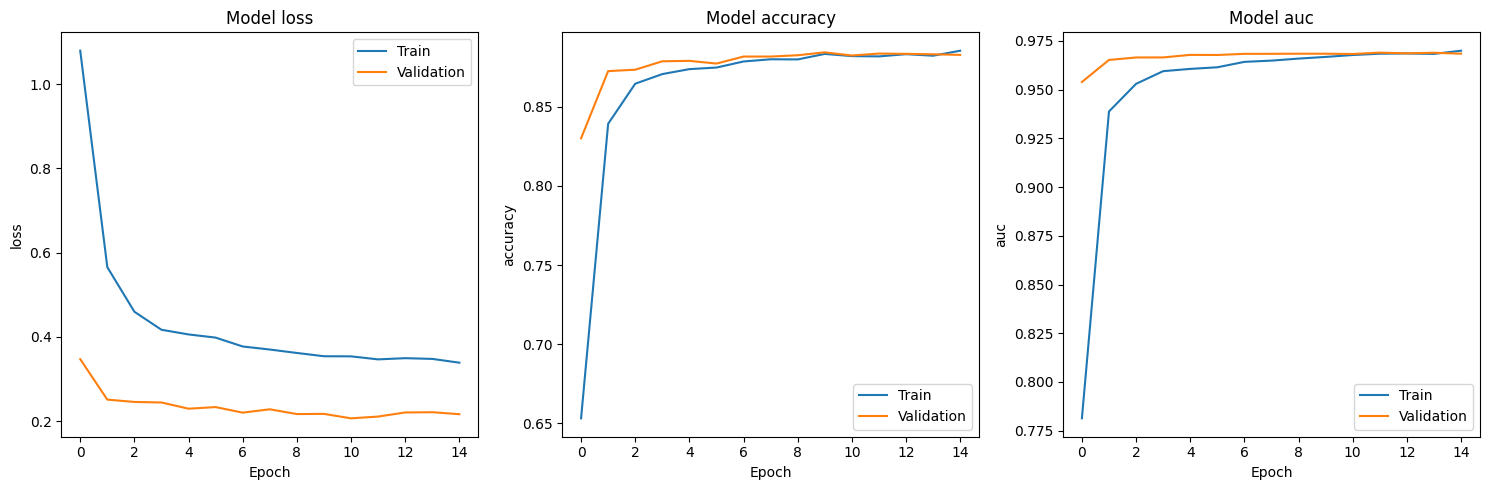

In [105]:
# Plot training history
plot_metrics(history)

**Model Loss**
(Train): Drops sharply from 1.3 to 0.3
(Validation): Stays steady around 0.2
Shows model is learning and reducing errors

**Model Accuracy**
Improves from 54% to ~88%
Both train and validation converge
Stable performance after epoch 8

**Model AUC**
Increases from 0.63 to 0.97
High AUC indicates good discrimination
Validation slightly better than training

**The plots indicate:**

Model learns quickly in first 5 epochs
No major overfitting (train/validation lines close)
Good convergence but might need improvement for fraud detection

In [106]:
# Evaluate on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

1524/1524 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


In [107]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     47610
           1       0.16      1.00      0.28      1131

    accuracy                           0.88     48741
   macro avg       0.58      0.94      0.61     48741
weighted avg       0.98      0.88      0.92     48741



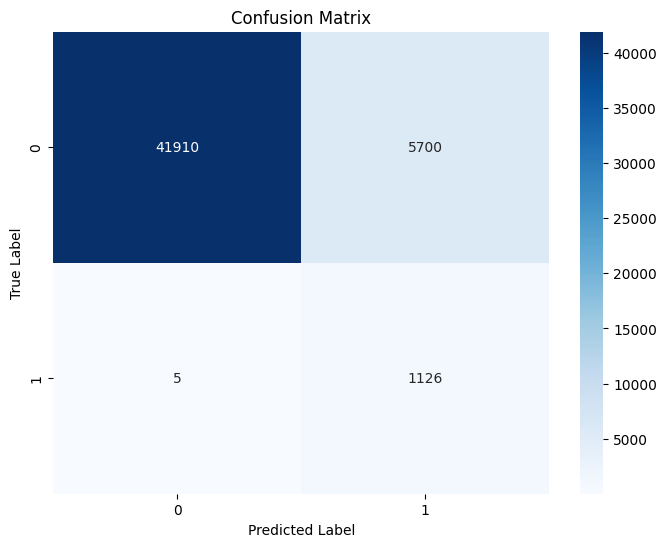

In [108]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values for TP, FP, TN, FN
TN, FP, FN, TP = cm.ravel()

# Plot confusion matrix with labels showing TP, FP, TN, FN
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add text to indicate TP, FP, TN, FN
plt.text(0, 0, f'TN = {TN}', ha='center', va='center', color='black', fontsize=12)
plt.text(1, 0, f'FP = {FP}', ha='center', va='center', color='black', fontsize=12)
plt.text(0, 1, f'FN = {FN}', ha='center', va='center', color='black', fontsize=12)
plt.text(1, 1, f'TP = {TP}', ha='center', va='center', color='black', fontsize=12)

# Set titles and labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [109]:
# Quick evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

1524/1524 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     47610
           1       0.16      1.00      0.28      1131

    accuracy                           0.88     48741
   macro avg       0.58      0.94      0.61     48741
weighted avg       0.98      0.88      0.92     48741



In [ ]:
# Making Prediction
val = X_train[0]
yhat = model.predict(asarray([val]))
print('Predicted: class=%d' % argmax(yhat))

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predicting on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

# Confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Let us implement an **early stopping strategy.** The idea is to detect overfitting, i.e. when validation error starts increasing, and stop the training process. Sometimes, the validation error might increase at a given epoch, but then decrease again. For that reason, it is important to also consider a patience parameter, i.e. a number of iterations for which the training process waits in order to make sure that the error is definitely increasing.

# **Model from the sample code-Custom NN**

In [ ]:
keras.layers.BatchNormalization()
model = Sequential()
#First Hidden Layer
model.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=43)) #As we have 43 columns

#All other hidden layers in a for loop with nodes reducing in each loop
nodes = 1024
for i in range(9):
    nodes = nodes // 2
    model.add(Dense(nodes, activation='relu', kernel_initializer='random_normal'))

#Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          45,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 745,129 (2.84 MB)

 Trainable params: 745,129 (2.84 MB)

 Non-trainable params: 0 (0.00 B)

As F1 score is not accessible in Keras, binary crossentropy is used to measure loss and accuracy because the output data is binary classification.

In [ ]:
## Compiling the model created
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **Fitting the model using custom neural network**
Intitally we'll tried with 10 epochs which had a good accuracy but the loss was high, then we increased it to 15 which reduced the loss significantly and we stopped there to avoid overfitting of the data.

In [ ]:
csvlogger = CSVLogger('training.log',separator=',',append=False)
result = model.fit(X_train, y_train, batch_size = 512, epochs = 15, callbacks=[csvlogger])

Epoch 1/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9520 - loss: 0.6675
Epoch 2/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.9781 - loss: 0.5736
Epoch 3/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.9776 - loss: 0.4958
Epoch 4/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.9772 - loss: 0.4315
Epoch 5/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9776 - loss: 0.3778
Epoch 6/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.9784 - loss: 0.3328
Epoch 7/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9774 - loss: 0.2971
Epoch 8/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.9774 - loss: 0.2667
Epoch 9/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.9781 - loss: 0.2403
Epoch 10/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9776 - loss: 0.2197
Epoch 11/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9777 - loss: 0.2017
Epoch 12/15
223/223 ━━━━━━━━━━

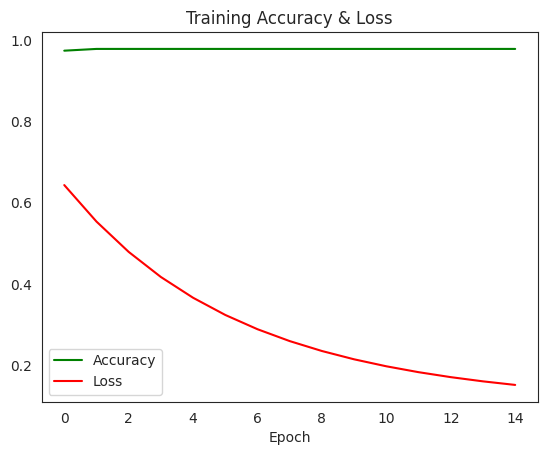

In [ ]:
plt.plot(result.history['accuracy'],'green',label='Accuracy')
plt.plot(result.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)

In [ ]:
# Predicting the custom model

train_evaluate=model.evaluate(X_train, y_train)
test_evaluate=model.evaluate(X_test, y_test)
print('accuracy for Train set is',train_evaluate)
print('accuracy for Test set is',test_evaluate) # evaluation of model.
yf_pred1=model.predict(X_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(y_test,yf_pred,average="weighted"))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9776 - loss: 0.1483
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.1507
accuracy for Train set is [0.14811868965625763, 0.9776568412780762]
accuracy for Test set is [0.15008322894573212, 0.9767957329750061]
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
0.9653297639890498
